In [1]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as ipd

In [2]:
CREMA='AudioWAV'
dir_list=os.listdir(CREMA)
dir_list.sort()
dir_list[:5]

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav']

In [3]:
emotion_gender = []
gender = []
emotion = []
intensity=[]
path = []
female_ids = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,
              1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,1052,1053,1054,
              1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,
              1082,1084,1089,1091]

temp_dict = {"SAD":"sad", "ANG": "angry", "DIS":"disgust", "FEA":"fear", 
             "HAP":"happy", "NEU":"neutral"}

intensity_dict={"LO": "Low", "MD": "Medium", "HI": "High", "XX": "Unspecified"}

def get_emotion_crema(filename, ids=female_ids, dc=temp_dict, i_dc=intensity_dict):
  filename = filename.split("_")
  emotion1 = dc[filename[2]]
  in_tense = i_dc[filename[-1].split(".")[0]]
  if int(filename[0]) in ids:
    emotion2 = "female"
  else:
    emotion2 = "male"
  emotion_gender = emotion1 + '_' + emotion2
  return (emotion_gender, emotion1, emotion2, in_tense)


for i in dir_list: 
  label, emo, gen, intense = get_emotion_crema(i)
  emotion_gender.append(label)
  emotion.append(emo)
  gender.append(gen)
  intensity.append(intense)
  path.append(CREMA + '/' + i)

In [4]:
CREMA_df = pd.DataFrame({'emotion_gender_label': emotion_gender, 'gender': gender, 'emotion': emotion, 'intensity': intensity, 'path': path})
CREMA_df.insert(1, 'source', 'CREMA')

In [5]:
CREMA_df.head()

,emotion_gender_label,source,gender,emotion,intensity,path
0,angry_male,CREMA,male,angry,Unspecified,AudioWAV/1001_DFA_ANG_XX.wav
1,disgust_male,CREMA,male,disgust,Unspecified,AudioWAV/1001_DFA_DIS_XX.wav
2,fear_male,CREMA,male,fear,Unspecified,AudioWAV/1001_DFA_FEA_XX.wav
3,happy_male,CREMA,male,happy,Unspecified,AudioWAV/1001_DFA_HAP_XX.wav
4,neutral_male,CREMA,male,neutral,Unspecified,AudioWAV/1001_DFA_NEU_XX.wav


In [6]:
for i in range(len(CREMA_df.columns)-1):
    print(f"Unique values in {CREMA_df.columns[i]} are {CREMA_df.iloc[:, i].unique()}")

Unique values in emotion_gender_label are ['angry_male' 'disgust_male' 'fear_male' 'happy_male' 'neutral_male'
 'sad_male' 'angry_female' 'disgust_female' 'fear_female' 'happy_female'
 'neutral_female' 'sad_female']
Unique values in source are ['CREMA']
Unique values in gender are ['male' 'female']
Unique values in emotion are ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad']
Unique values in intensity are ['Unspecified' 'High' 'Low' 'Medium']


In [7]:
CREMA_df['intensity'].value_counts()

intensity
Unspecified    6077
High            455
Low             455
Medium          455
Name: count, dtype: int64

In [8]:
CREMA_df['emotion_gender_label'].value_counts()

emotion_gender_label
angry_male        671
disgust_male      671
fear_male         671
happy_male        671
sad_male          671
angry_female      600
disgust_female    600
fear_female       600
happy_female      600
sad_female        600
neutral_male      575
neutral_female    512
Name: count, dtype: int64

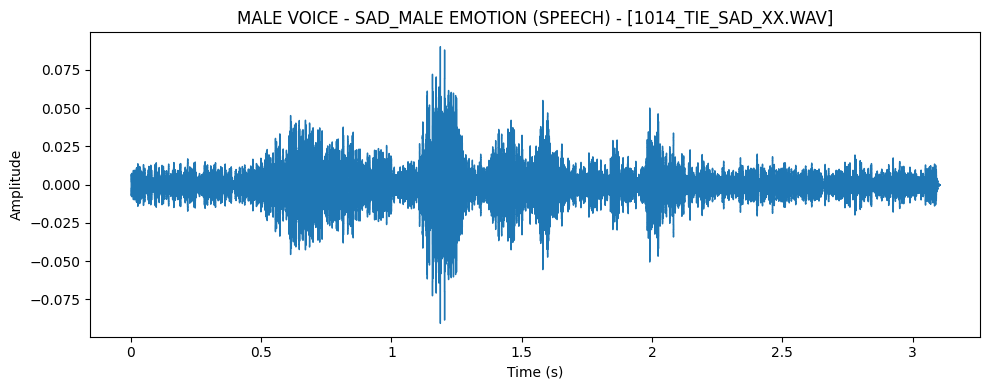

In [9]:
n_files = CREMA_df.shape[0]
rnd = np.random.randint(0,n_files)
fname = CREMA_df.path[rnd] 

y, sr = librosa.load(fname, sr=16000)

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
info = CREMA_df.iloc[rnd].values
title_txt = f'{info[2]} voice - {info[0]} emotion (speech) - [{os.path.basename(fname)}]'
plt.title(title_txt.upper())
plt.tight_layout()
plt.show()
ipd.Audio(fname)

In [10]:
def extract_mfcc(file_path, n_mfcc=40, max_len=200):
    y, sr = librosa.load(file_path, sr=16000)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    if mfcc.shape[1] < max_len: #Padding
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0,0), (0,pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_len]
    return mfcc

In [11]:
CREMA_df['mfcc'] = CREMA_df['path'].apply(lambda x: extract_mfcc(x))
CREMA_df.head()

,emotion_gender_label,source,gender,emotion,intensity,path,mfcc
0,angry_male,CREMA,male,angry,Unspecified,AudioWAV/1001_DFA_ANG_XX.wav,"[[-589.87604, -507.21228, -465.8268, -460.9645..."
1,disgust_male,CREMA,male,disgust,Unspecified,AudioWAV/1001_DFA_DIS_XX.wav,"[[-494.1741, -463.85815, -459.60843, -453.1035..."
2,fear_male,CREMA,male,fear,Unspecified,AudioWAV/1001_DFA_FEA_XX.wav,"[[-466.0973, -458.1281, -459.86917, -459.22717..."
3,happy_male,CREMA,male,happy,Unspecified,AudioWAV/1001_DFA_HAP_XX.wav,"[[-465.77594, -436.83945, -431.25726, -436.799..."
4,neutral_male,CREMA,male,neutral,Unspecified,AudioWAV/1001_DFA_NEU_XX.wav,"[[-484.9637, -454.3514, -450.37292, -445.42505..."


In [ ]:
CREMA_df.to_csv('CREMA_dataframe.csv', index=False)